# Домашнее задание 12

(прислать до 02:00 13.02.2017)

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне в Piazza через Private Post.
Файл с Вашим решением должен называться ```Surname_HW#```, где вместо ```Surname``` Вы пишите свою фамилию латиницей, а вместо ```#``` - номер домашнего задания. 
Решение каждой задачи необходимо поместить после её условия.

Пожалуйста, пишите свои решения чётко и понятно. 
При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 
Если возникает ошибка, то я сообщаю Вам об этом и жду исправленного решения, которое будет удовлетворять указанному требованию.

## Задача 1

Выберите произвольную несимметричную относительно некоторой вертикальной оси унимодальную функцию и приведите не меньше 3-х итераций метода дихотомии и метода золотого сечения (руками, а не с помощью компьютера). Нарисуйте график выбранной функции с помощью библиотеки matplotlib.

Убедитесь, что Вы выбрали уникальную функцию, которую не выбрал никто из Ваших одногруппников. Две функции считаются одинаковыми, если одну можно получить из другой параллельным переносом.

## Решение

Рассмотрим функцию $f(x) = x^2(x^5-1)$,
$x^* \in [0,1],\; f(0)=f(1)=0$ 

### Метод дихотомии

$c = \dfrac{a+b}{2}, \;a = 0, b = 1$

Далее: $y = \dfrac{a+c}{2}, z = \dfrac{c+b}{2}$

1) $c = \frac{1}{2}, \;f(\frac{1}{2}) = -0.21875$

$y = \frac{1}{4},\; f(y) = -0.0624 > f(c)$

$z = \frac{3}{4},\; f(z) = -0.429 < f(c) $, тогда $a = c, c = z$

2) $c = \frac{3}{4}, \;f(c) = -0.429$

$y =  \frac{5}{8}, f(y) = -0.3534 > f(c)$

$z = \frac{7}{8}, f(z) = -0.3729 > f(c)$, тогда $a = y, b = z$

3) $c = \frac{3}{4}, \;f(c) = -0.429$

$y = \frac{11}{16}, f(y) = -0.4 > f(c)$

$z = \frac{13}{16}, f(z) = -0.426 < f(c)$, тогда $a = c, c = z$

То есть, $a = \frac{3}{4} = 0.75, c = \frac{13}{16} = 0.8125, b = \frac{7}{8} = 0.875$ 

Из графика видно, что корень находится на отрезке $[\frac{3}{4}, \frac{7}{8}]$, значит, скорее всего, итерации проведены верно.


### Метод золотого сечения 

$\tau = \dfrac{\sqrt{5} + 1}{2}, \dfrac{1}{\tau} = 0.618$

Далее $y = a + \dfrac{(b - a) }{\tau^2}$, $z = a + \dfrac{(b - a)}{\tau}$, в начале $a = 0, b = 1$.

1)$y = 0.382, z = 0.618$

$f(y) =-0.1447 > f(z) = -0.3475$, тогда $a = y, y = z, z = a + \dfrac{(b - a)}{ \tau}$

2) $a = 0.382, y = 0.618, z = 0.763, b = 1$

$f(y) =-0.3475 > f(z) =-0.432$, тогда  $a = y, y = z, z = a + \dfrac{(b - a)}{\tau}$

3) $a = 0.618, y = 0.763, z = 0.854, b = 1$

$f(y) = -0.431 <  f(z) = -0.398$, тогда $b = z, z = y, y = a + \dfrac{(b - a)}{\tau^2}$

4) $b = 0.854, z = 0.763, y = 0.708$ ...

Получаем, что корень находится в отрезке $[0.618, 0.854]$, т.е. $x = 0.736$, что также похоже на правду.


Text(0.5,1,'f(x) = x^2(x^5 -1)')

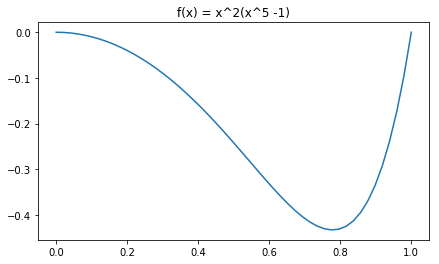

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

f = lambda x: x**2*(x**5 - 1)
a = 0
b = 1

plt.figure(figsize=(7,4))
plt.plot(np.linspace(a,b), f(np.linspace(a,b)))
plt.title("f(x) = x^2(x^5 -1)", fontsize=12)

## Задача 2

Запустите метод дихотомии для функции $f(x) = -\sin\left(\frac{2 \pi}{\frac{5}{16} + x}\right)$ на интервале $[0,1]$ и $[0,4]$. Точкой минимума считайте середину итогового отрезка. Одинаковые ли точки минимума? Почему?

## Решение

In [2]:
def binary_search(f, a, b, epsilon = 1e-5, callback=None):
    c = (a + b) / 2.0
    while abs(b - a) > epsilon:
        y = (a + c) / 2.0
        if f(y) <= f(c):
            b = c
            c = y
        else:
            z = (b + c) / 2.0
            if f(c) <= f(z):
                a = y
                b = z
            else:
                a = c
                c = z
        if callback is not None:
            callback(a, b)
    return c

In [3]:
f = lambda x: -np.sin(2*np.pi / (5/16.0 + x))

print('Получаем на отрезке [0,1]: {0:.4f}'.format(binary_search(f, 0 , 1))
      + ' и на отрезке [0,4]: {0:.4f}'.format(binary_search(f, 0 , 4)))

Получаем на отрезке [0,1]: 0.4875 и на отрезке [0,4]: 3.6875


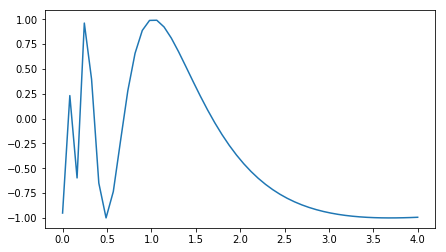

In [4]:
a = 0
b = 4
plt.figure(figsize=(7,4))
plt.plot(np.linspace(a,b), f(np.linspace(a,b)))

Точки минимума не одинаковые. Это происходит потому, что у функции есть несколько локальных минимумов на отрезке $[0,4]$. Когда работает метод дихотомии, мы можем придти в различные минимумы, в зависимости от вида функции. Конкретно в нашем случае на $[0,4]$, при первой итерации сравнивая значения на левом и правом отрезке, в левом отрезке мы попадаем в максимум в точке $x = 1$ и далее работаем на правом участке с одним минимумом. 

## Задача 3

Покажите, как свести задачу безусловной **целочисленной** оптимизации к задаче нелинейной условной оптимизации с **непрерывными** переменными. 

## Решение

Задачу можно записать в виде:

$$min \; f(x) \;\; s.t. \;x \in Q,  sin(\pi x_i) = 0, i = 1\dots n$$
где Q - допустимое множество, n - размерность пространства 

## Задача 4*

Реализуйте метод Фибоначчи (см. лекции) и сравните его сходимость с методом дихотомии и золотого сечения, как было показано на семинаре, то есть по времени и по числу итераций, необходимых для достижения заданной точности

### Решение

In [5]:
#we will use dynamic programming for fibonacci numbers counting
def fibonacci_numbers(a, b, epsilon):
    N = 1
    F = [1, 1]
    L  = (b - a) / epsilon
    
    while F[N] <= L:
        F.append(F[N] + F[N - 1])
        N += 1
    return F, N


def fibonacci_search(f, a, b, epsilon = 1e-5, callback=None ):     
    F, N = fibonacci_numbers(a, b, epsilon)
    
    y = a + (F[N - 2] / F[N]) *(b - a)
    z = a + (F[N - 1] / F[N]) *(b - a)
    
    k = 1
    while k < N - 2:
        if f(y) > f(z):
            a = y
            y = z 
            z = a + (F[N - k - 1] / F[N - k]) * (b - a)
        else:
            b = z
            z = y
            y = a + (F[N - k - 2] / F[N - k]) * (b - a)
        k += 1
        if callback is not None:
            callback(a, b)
    return (a + b)/2
    

In [6]:
f1 = lambda x: np.sin(np.sin(np.sin(np.sqrt(x))))
x1_true = (3 * np.pi / 2)**2
f2 = lambda x: x**2*(x**5 - 1)
x2_true = (2/7)**(1/5)
a = 2
b = 60
c = 0
d = 1
epsilon = 1e-8

In [7]:
print (fibonacci_search(f1, a, b), x1_true)

22.206613517363657 22.206609902451056


In [8]:
print (fibonacci_search(f2, c, d), x2_true)

0.7783686044500095 0.7783705415511708


In [9]:
def golden_search(f, a, b, tol=1e-5, callback=None):
    tau = (np.sqrt(5) + 1) / 2.0
    y = a + (b - a) / tau**2
    z = a + (b - a) / tau
    while b - a > tol:
        if f(y) <= f(z):
            b = z
            z = y
            y = a + (b - a) / tau**2
        else:
            a = y
            y = z
            z = a + (b - a) / tau
        if callback is not None:
            callback(a, b)
    return (a + b) / 2.0

### Сравнение по времени

In [10]:
%timeit binary_search(f1, a, b, epsilon)
%timeit golden_search(f1, a, b, epsilon)
%timeit fibonacci_search(f1, a, b, epsilon)

889 µs ± 16.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
861 µs ± 2.59 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
751 µs ± 5.27 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [11]:
%timeit binary_search(f2, c, d, epsilon)
%timeit golden_search(f2, c, d, epsilon)
%timeit fibonacci_search(f2, c, d, epsilon)

60.5 µs ± 293 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
170 µs ± 13.2 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
78.2 µs ± 4.25 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### Сравнение по числу итераций 

In [12]:
def my_callback(a, b, left_bound, right_bound, approximation):
    left_bound.append(a)
    right_bound.append(b)
    approximation.append((a + b) / 2.0)

In [13]:
left_boud_bs = []
right_bound_bs = []
approximation_bs = []

callback_bs = lambda a, b: my_callback(a, b, 
            left_boud_bs, right_bound_bs, approximation_bs)

x_bs = binary_search(f1, a, b, epsilon, callback_bs)
print(np.abs(x_bs - x1_true))

9.81513963438e-08


In [14]:
left_boud_gs = []
right_bound_gs = []
approximation_gs = []

callback_gs = lambda a, b: my_callback(a, b, left_boud_gs, right_bound_gs, approximation_gs)
x_gs = golden_search(f1, a, b, epsilon, callback_gs)

print(np.abs(x_gs - x1_true))

9.96203119996e-08


In [15]:
left_boud_fs = []
right_bound_fs = []
approximation_fs = []

callback_fs = lambda a, b: my_callback(a, b, left_boud_fs, right_bound_fs, approximation_fs)
x_fs = fibonacci_search(f1, a, b, epsilon, callback_fs)

print(np.abs(x_fs - x1_true))

1.02193368434e-07


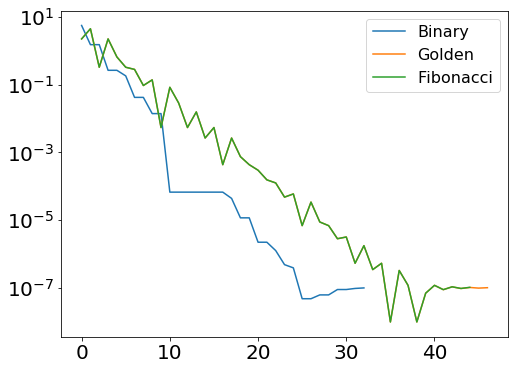

In [16]:
plt.figure(figsize=(8,6))
plt.semilogy(np.abs(x1_true - np.array(approximation_bs, dtype=np.float64)), label="Binary")
plt.semilogy(np.abs(x1_true - np.array(approximation_gs, dtype=np.float64)), label="Golden")
plt.semilogy(np.abs(x1_true - np.array(approximation_fs, dtype=np.float64)), label="Fibonacci")
plt.legend(fontsize=16)
plt.xticks(fontsize=20)
_ = plt.yticks(fontsize=20)